**📘 Introduction to the Dataset**

This dataset contains statistical records of UFC/MMA fighters, including their physical attributes, fighting styles, and performance metrics inside the octagon. Each row represents a single fighter, and the goal is typically to use these features to analyze performance, predict fight outcomes, or build classification models (e.g., predicting the winner between two fighters).

In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import skew from scipy.stats
from scipy.stats import skew

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# --------------------------------------------
# 🧠 Machine Learning Model
# --------------------------------------------
from sklearn.linear_model import LogisticRegression    # Logistic regression algorithm

# --------------------------------------------
# 📈 Model Evaluation
# --------------------------------------------
from sklearn.metrics import (
    accuracy_score,            # Accuracy of the predictions
    classification_report,     # Precision, recall, f1-score summary
    confusion_matrix           # Confusion matrix for performance
)

# --------------------------------------------
# ⚖️ Handling Imbalanced Datasets
# --------------------------------------------
from imblearn.over_sampling import SMOTE               # For oversampling the minority class




This code allows you to upload a CSV file from your local computer into Google Colab.
The files.upload() function opens a file dialog to select files and stores them in the uploaded dictionary.


In [124]:
# Step 2: Upload CSV file

from google.colab import files

uploaded = files.upload()




Saving fighter_stats.csv to fighter_stats (2).csv


This line loads the uploaded CSV file named fighter_stats.csv into a Pandas DataFrame called df,
so you can now easily view, analyze, and manipulate the data using Python.

In [75]:
# Load the uploaded CSV file into a DataFrame
df = pd.read_csv("fighter_stats.csv")

This command displays the first 5 rows of the DataFrame df.
It helps you quickly preview the structure and contents of your dataset after loading it.

In [76]:
df.head()

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


The output of df.head() shows the first 5 fighters and their corresponding stats from the fighter_stats.csv dataset. Here's how to interpret the sample data:

| Fighter Name     | Wins | Losses | Height (cm) | Weight (kg) | Reach (cm) | Stance   | Age | SLpM | Sig Str Acc | SApM | Str Def | TD Avg | TD Acc | TD Def | Sub Avg |
| ---------------- | ---- | ------ | ----------- | ----------- | ---------- | -------- | --- | ---- | ----------- | ---- | ------- | ------ | ------ | ------ | ------- |
| Amanda Ribas     | 12   | 5      | 160.02      | 56.70       | 167.64     | Orthodox | 30  | 4.63 | 0.40        | 3.40 | 0.61    | 2.07   | 0.51   | 0.85   | 0.70    |
| Rose Namajunas   | 13   | 6      | 165.10      | 56.70       | 165.10     | Orthodox | 31  | 3.69 | 0.41        | 3.51 | 0.63    | 1.38   | 0.47   | 0.59   | 0.50    |
| Karl Williams    | 10   | 1      | 190.50      | 106.59      | 200.66     | Orthodox | 34  | 2.87 | 0.52        | 1.70 | 0.60    | 4.75   | 0.50   | 1.00   | 0.20    |
| Justin Tafa      | 7    | 4      | 182.88      | 119.75      | 187.96     | Southpaw | 30  | 4.09 | 0.54        | 5.02 | 0.47    | 0.00   | 0.00   | 0.50   | 0.00    |
| Edmen Shahbazyan | 13   | 4      | 187.96      | 83.91       | 190.50     | Orthodox | 26  | 3.60 | 0.52        | 4.09 | 0.45    | 2.24   | 0.38   | 0.63   | 0.60    |



Column Meaning (Short Summary):
SLpM: Strikes landed per minute

sig_str_acc:  Accuracy of significant strikes (0–1)

SApM: Strikes absorbed per minute

str_def: Strike defense (0–1)

td_avg: Takedowns per 15 min

td_acc: Takedown accuracy (0–1)

td_def: Takedown defense (0–1)

sub_avg: Submission attempts per 15 min

This command displays the last 5 rows of the DataFrame df.

✅ Purpose:
Helps you inspect the bottom of your dataset.

Useful to check if the data ends correctly or if there are extra blank/malformed rows at the end of the file.

In [77]:
df.tail()

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
2474,Thaddeus Luster,0.0,1.0,190.50,95.25,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2475,David Levicki,1.0,3.0,195.58,124.74,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,Ray Wizard,0.0,1.0,187.96,102.06,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2477,Sean Daugherty,0.0,2.0,182.88,79.38,NaN,NaN,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🔎 **df.tail() Output – Interpretation**

---



Here’s what we see from the last 5 rows of your dataset:

✅ Rows 2474 to 2477:
These rows belong to fighters, but they have:

Missing values (NaN) in important columns like reach, stance, age

All performance stats are zero, which may indicate:

The fighters had very short or no active fighting records

Or the data was not properly recorded

⚠️ Row 2478:
This row contains only NaN (missing) values.

It might be an extra blank row created while exporting the CSV.

This removes 10 columns from the DataFrame, including the fighter’s name, fighting stance, and various performance metrics.
It helps simplify the dataset and retain only the features you want to keep for further analysis or modeling.



In [78]:
# Remove 'name','sub_avg','td_def','td_acc','td_avg','str_def','SApM','sig_str_acc','SLpM' column from the DataFrame

df = df.drop(columns=['name','sub_avg','td_def','td_acc','td_avg','str_def','SApM','sig_str_acc','SLpM','stance'])

After dropping the specified columns, your DataFrame now includes only the following columns:

['wins', 'losses', 'height', 'weight', 'reach', 'age']



In [79]:
df.head()

,wins,losses,height,weight,reach,age
0,12.0,5.0,160.02,56.70,167.64,30.0
1,13.0,6.0,165.10,56.70,165.10,31.0
2,10.0,1.0,190.50,106.59,200.66,34.0
3,7.0,4.0,182.88,119.75,187.96,30.0
4,13.0,4.0,187.96,83.91,190.50,26.0


In [80]:
df.tail()

,wins,losses,height,weight,reach,age
2474,0.0,1.0,190.50,95.25,NaN,NaN
2475,1.0,3.0,195.58,124.74,NaN,NaN
2476,0.0,1.0,187.96,102.06,NaN,NaN
2477,0.0,2.0,182.88,79.38,NaN,48.0
2478,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Confirm removal
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['wins', 'losses', 'height', 'weight', 'reach', 'age']


It means:

There are 2,478 rows (fighters or entries)

And 6 columns (wins, losses, height, weight, reach, age)

In [82]:
df.shape

(2479, 6)

✅ What It Does:

Displays a concise summary of the DataFrame including:

Number of rows

Number of columns

Column names

Data types (float64, int64, etc.)

Count of non-null values in each column

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wins    2478 non-null   float64
 1   losses  2478 non-null   float64
 2   height  2478 non-null   float64
 3   weight  2478 non-null   float64
 4   reach   1823 non-null   float64
 5   age     2318 non-null   float64
dtypes: float64(6)
memory usage: 116.3 KB


This command gives you summary statistics for all numerical columns in your DataFrame.

In [84]:
df.describe()

,wins,losses,height,weight,reach,age
count,2478.000000,2478.000000,2478.000000,2478.000000,1823.000000,2318.000000
mean,14.399112,6.111380,178.384262,76.876852,182.035656,37.727783
std,9.853474,4.548011,8.851777,17.976646,10.654129,7.251188
min,0.000000,0.000000,152.400000,52.160000,147.320000,19.000000
25%,9.000000,3.000000,172.720000,65.770000,175.260000,32.000000
50%,13.000000,5.000000,177.800000,77.110000,182.880000,37.000000
75%,18.000000,8.000000,185.420000,83.910000,190.500000,42.000000
max,253.000000,53.000000,210.820000,349.270000,213.360000,81.000000



| Feature         | Count | Mean   | Min–Max           | Notes                                                                   |
| --------------- | ----- | ------ | ----------------- | ----------------------------------------------------------------------- |
| **wins**        | 2478  | 14.40  | 0 – 253           | Most fighters have < 20 wins; 253 is an outlier ⚠️                      |
| **losses**      | 2478  | 6.11   | 0 – 53            | Normal loss range; a few fighters have very high loss counts            |
| **height (cm)** | 2478  | 178.38 | 152.4 – 210.8     | Average height is \~178 cm (\~5'10")                                    |
| **weight (kg)** | 2478  | 76.88  | 52.16 – 349.27 ⚠️ | 349.27 kg is likely an outlier or error                                 |
| **reach (cm)**  | 1823  | 182.04 | 147.32 – 213.36   | Missing values (\~26%), but overall reasonable                          |
| **age**         | 2318  | 37.73  | 19 – 81 ⚠️        | Avg fighter is \~38 years old; 81 seems unrealistic (likely data issue) |


✅ **What This Code Does:**

It counts the number of missing (NaN) values in each column of your DataFrame df.

In [85]:
#Find Missing Values
# Check how many missing values are in each column
df.isnull().sum()


,0
wins,1
losses,1
height,1
weight,1
reach,656
age,161


**Interpretation:**
The columns wins, losses, height, and weight each have only 1 missing value — this can usually be safely filled using mean or median.

reach and age have many missing values (656 and 161 respectively). These may require:

Imputation (mean, median, or predictive models)

Or dropping rows, if they are not critical and data loss is acceptable.

✅**Explanation (for Colab Report):**
This command counts and prints the number of duplicate rows in the DataFrame.

df.duplicated() returns a Boolean Series: True if a row is a duplicate of a previous one.

.sum() adds up the True values to give the total number of duplicate rows.

In [86]:
print("Duplicate value ",df.duplicated().sum())

Duplicate value  5


In [87]:
df = df.drop_duplicates()


📘 **Explanation (for Colab Report):**
This line removes all duplicate rows from the DataFrame df.

It keeps only the first occurrence of each row and drops the rest.



In [88]:
print(df.dtypes)

wins      float64
losses    float64
height    float64
weight    float64
reach     float64
age       float64
dtype: object


✅ **Explanation:**
This command displays the number of unique (distinct) values in each column of the DataFrame df.

🧠 Why it's useful:

Helps identify columns with low variability (may not be useful for prediction).

Detects columns with potential errors (e.g., only 1 unique value or all unique).

Can guide feature engineering or encoding steps later in your ML workflow.

In [89]:
print(df.nunique())

wins      54
losses    33
height    23
weight    80
reach     27
age       47
dtype: int64


✅ **What It Does:**

re is Python's regular expression library used to search for patterns.

This code:

Loops through all object (text) columns.

Detects if any value ends with a special character not in a-z, A-Z, 0-9, space, dot, comma, &, or hyphen.

Flags such values as potentially invalid or dirty data.

💡 Why It's Useful:
Helps in data cleaning before training your machine learning model.

Especially important if you have names, categories, or text fields with symbols or noise.



In [90]:
#re stands for Regular Expressions – it helps us search for patterns like special characters, numbers, etc., in strings.
import re

#Detect special characters or invalid strings in object columns
print("🔍 Special Characters or Invalid Strings:")
for col in df.select_dtypes(include='object').columns:
    invalids = df[col].astype(str).apply(lambda x: bool(re.search(r'[^a-zA-Z0-9\s.,&-]$', str(x))))
    if invalids.any():
        print(f"⚠️ Column '{col}' has suspicious entries:")
        print(df[col][invalids].unique())

🔍 Special Characters or Invalid Strings:


✅ **Explanation**
This removes any row in the DataFrame where all column values are missing (NaN).

inplace=True means the DataFrame is updated directly without needing to assign it again.

This step helps ensure you don’t keep completely empty records that can affect analysis or model training.

In [91]:
df.dropna(how='all', inplace=True)


✅ **Explanation:**
This keeps only those rows that have at least 5 non-missing (non-NaN) values.

It helps remove rows with too many missing values, which may not be useful for analysis or modeling.

In [92]:
df.dropna(thresh=5, inplace=True)  # Keep rows with at least 5 non-NaN values


✅ **Explanation:**
This replaces all missing values in the age column with the median age of the dataset.

Median is used because it's less affected by outliers compared to the mean.

In [93]:
df['age'].fillna(df['age'].median(), inplace=True)
# df['stance'].fillna('Orthodox', inplace=True)  # example common stance

In [94]:
df.tail()

,wins,losses,height,weight,reach,age
2457,0.0,4.0,162.56,107.05,NaN,53.0
2458,0.0,1.0,177.80,86.18,NaN,81.0
2460,0.0,1.0,180.34,81.65,NaN,59.0
2464,1.0,2.0,203.20,349.27,NaN,63.0
2477,0.0,2.0,182.88,79.38,NaN,48.0


In [95]:
df.isnull().sum()


,0
wins,0
losses,0
height,0
weight,0
reach,496
age,0


In [96]:
df['reach'].fillna(df['reach'].median(), inplace=True)


In [97]:
df.isnull().sum()


,0
wins,0
losses,0
height,0
weight,0
reach,0
age,0


**there is no target variable so we have to create mannually**

from itertools import combinations

We generate fighter matchups using combinations (all possible pairs from the first 100 fighters).

🔄 Fight Pair Generation & Target Creation:
For each fighter pair:

Calculate win ratio: wins / (wins + losses)

Simulate the winner: The fighter with the higher win ratio is assumed to win.

🧪 Features Used in Fight Dataset:
f1_height, f2_height: Heights of both fighters

f1_weight, f2_weight

f1_reach, f2_reach

f1_age, f2_age

f1_win_ratio, f2_win_ratio

🎯 Winner: 0 = Fighter 1 wins, 1 = Fighter 2 wins

✅ **Why This is Useful:**

This helps create a binary classification dataset (0 or 1) for predicting fight outcomes using historical stats.

In [98]:
import pandas as pd
from itertools import combinations

# Use cleaned DataFrame
df = df.reset_index(drop=True)

# Limit to first 100 rows for manageable pairing
df = df.head(100)

# Create fighter pairs
fight_pairs = list(combinations(df.index, 2))

fight_data = []

for i, j in fight_pairs:
    f1 = df.loc[i]
    f2 = df.loc[j]

    # Calculate win ratios
    wr1 = f1['wins'] / (f1['wins'] + f1['losses'] + 1e-6)
    wr2 = f2['wins'] / (f2['wins'] + f2['losses'] + 1e-6)

    # Simulated winner
    winner = 0 if wr1 > wr2 else 1

    fight_data.append({
        'f1_height': f1['height'],
        'f2_height': f2['height'],
        'f1_weight': f1['weight'],
        'f2_weight': f2['weight'],
        'f1_reach': f1['reach'],
        'f2_reach': f2['reach'],
        'f1_age': f1['age'],
        'f2_age': f2['age'],
        'f1_win_ratio': wr1,
        'f2_win_ratio': wr2,
        'Winner': winner  # 🎯 Target Variable
    })

# Create the new fight dataset
fight_df = pd.DataFrame(fight_data)

# Preview
fight_df.head(20)


,f1_height,f2_height,f1_weight,f2_weight,f1_reach,f2_reach,f1_age,f2_age,f1_win_ratio,f2_win_ratio,Winner
0,160.02,165.10,56.7,56.70,167.64,165.10,30.0,31.0,0.705882,0.684210,0
1,160.02,190.50,56.7,106.59,167.64,200.66,30.0,34.0,0.705882,0.909091,1
2,160.02,182.88,56.7,119.75,167.64,187.96,30.0,30.0,0.705882,0.636364,0
3,160.02,187.96,56.7,83.91,167.64,190.50,30.0,26.0,0.705882,0.764706,1
4,160.02,185.42,56.7,83.91,167.64,193.04,30.0,32.0,0.705882,0.700000,0
5,160.02,177.80,56.7,61.23,167.64,177.80,30.0,25.0,0.705882,1.000000,1
6,160.02,172.72,56.7,61.23,167.64,170.18,30.0,23.0,0.705882,0.818182,1
7,160.02,177.80,56.7,65.77,167.64,177.80,30.0,35.0,0.705882,0.750000,1
8,160.02,177.80,56.7,65.77,167.64,182.88,30.0,27.0,0.705882,0.736842,1
9,160.02,185.42,56.7,65.77,167.64,193.04,30.0,27.0,0.705882,0.761905,1


We use the Interquartile Range (IQR) method to detect outliers for each feature (excluding the target 'Winner').
IQR (Q3 - Q1) measures the spread of the middle 50% of the data.

Values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are flagged as outliers.

🔍 **Output Interpretation:**

The code prints the percentage of outliers for each numerical feature.

Helps identify which features may need transformation or capping to handle extreme values before modeling.

In [99]:
# 🔍 Print % of outliers for each feature using IQR method (excluding 'class')

print("🔎 Outlier Percentage per Feature (IQR Method):\n")

for col in fight_df.columns[:-1]:  # Exclude 'Winner' (target)
    Q1 = fight_df[col].quantile(0.25)
    Q3 = fight_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate outliers
    outliers = fight_df[(fight_df[col] < lower_bound) | (fight_df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(fight_df)) * 100

    print(f"{col}: {percent_outliers:.2f}% outliers")


🔎 Outlier Percentage per Feature (IQR Method):

f1_height: 0.00% outliers
f2_height: 0.00% outliers
f1_weight: 7.17% outliers
f2_weight: 6.83% outliers
f1_reach: 0.00% outliers
f2_reach: 0.00% outliers
f1_age: 0.00% outliers
f2_age: 0.00% outliers
f1_win_ratio: 0.00% outliers
f2_win_ratio: 0.00% outliers


📊 Outlier Detection Result Summary (Using IQR Method)
We calculated the percentage of outliers in each feature using the Interquartile Range (IQR) method.

✅ **Key Findings:**

Most features such as height, reach, age, and win ratio have 0% outliers, indicating their values are well-distributed within expected ranges.

The only features with moderate outliers are:

f1_weight: 7.17%

f2_weight: 6.83%

🔍 **Explanation:**

sns.countplot(x='Winner', data=fight_df):
This counts and plots the number of times each class (0 or 1) appears in the Winner column.

Winner = 0: Fighter 1 won

Winner = 1: Fighter 2 won

The graph helps detect class imbalance, which is important for classification models. If one class has much more data than the other, the model could become biased.

✅ If the Classes Are Balanced:
Good! Your model will have equal learning opportunities for both classes.

⚠️ If the Classes Are Imbalanced:
You may need to apply balancing techniques like:

SMOTE (Synthetic Minority Oversampling)

Undersampling

Class weights adjustment in your model



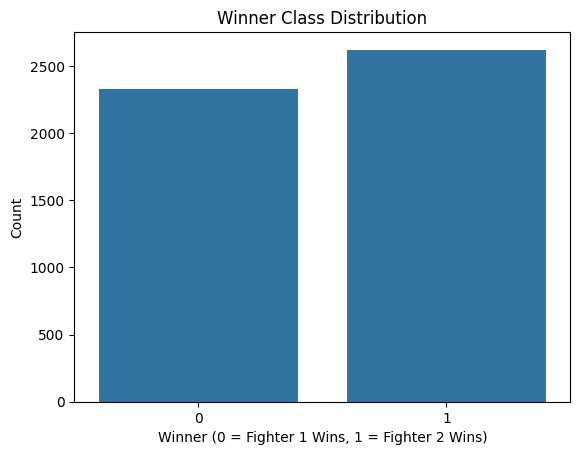

In [100]:
# Count how many people are Winner  (class=1) vs Loser (class=0)

sns.countplot(x='Winner', data=fight_df)
plt.title("Winner Class Distribution")
plt.xlabel("Winner (0 = Fighter 1 Wins, 1 = Fighter 2 Wins)")
plt.ylabel("Count")
plt.show()

Your class distribution is:

Fighter 1 wins (0): 2329 instances

Fighter 2 wins (1): 2621 instances

✅ **Good News:**

This class distribution is quite balanced (~47% vs. ~53%), so you do not need to apply class balancing techniques like SMOTE or class weights.

🔍 **Interpretation:**

2621 times Fighter 2 won (Winner = 1)

2329 times Fighter 1 won (Winner = 0)

✅ This means your dataset is fairly balanced, so your classification model will not suffer from class imbalance. You can now safely proceed with feature scaling and model training.

In [101]:
# How many people had Winner  vs. not # Interesting
print(fight_df['Winner'].value_counts())


Winner
1    2621
0    2329
Name: count, dtype: int64


In [102]:
# Total number of fights
total_fights = fight_df.shape[0]
print("Total number of fights:", total_fights)


Total number of fights: 4950


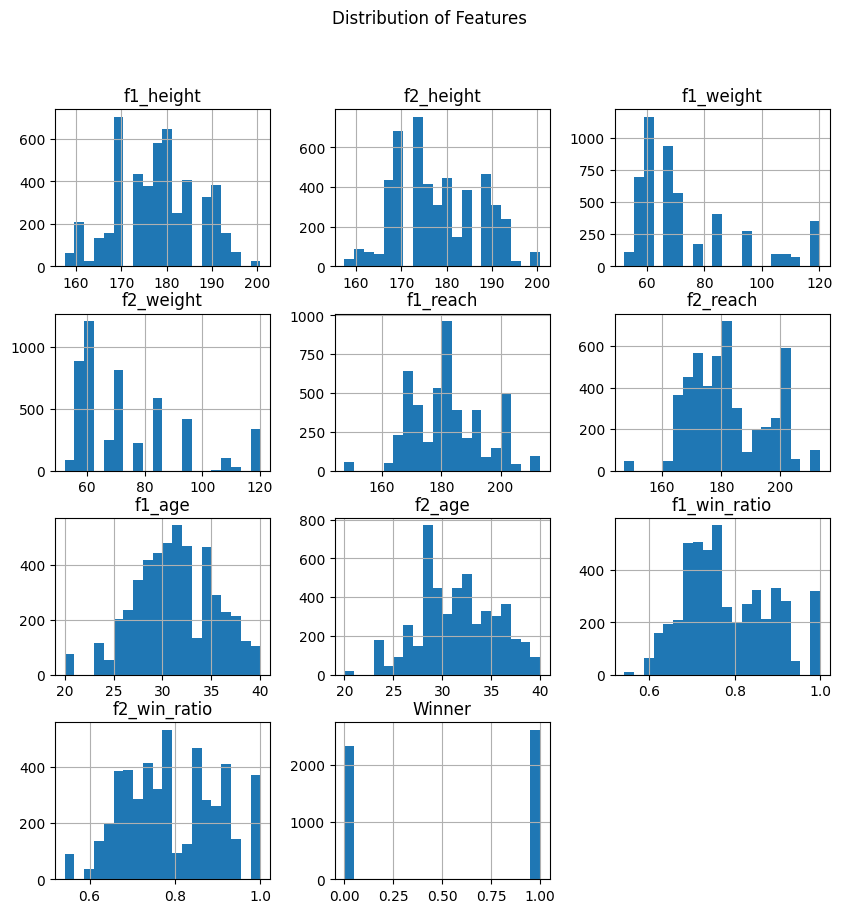

In [103]:
# Plotting histograms for each feature
fight_df.hist(figsize=(10, 10), bins=20)
plt.suptitle('Distribution of Features')
plt.show()

🔎 Observations from Your Histograms:
f1_weight & f2_weight

Clearly right-skewed (long tail on the right).

Some extreme values (possible outliers) are visible.

✅ Feature scaling is recommended (MinMaxScaler or StandardScaler).

You may also consider log-transforming these if they heavily affect models.

f1_height, f2_height, f1_reach, f2_reach, f1_age, f2_age

These look fairly symmetric or mildly skewed.

Scaling is still recommended for most ML models (like Logistic Regression or SVM), especially when combining with highly skewed features.

f1_win_ratio & f2_win_ratio

Appears slightly skewed but mostly fine.

✅ Still apply scaling for better model performance.

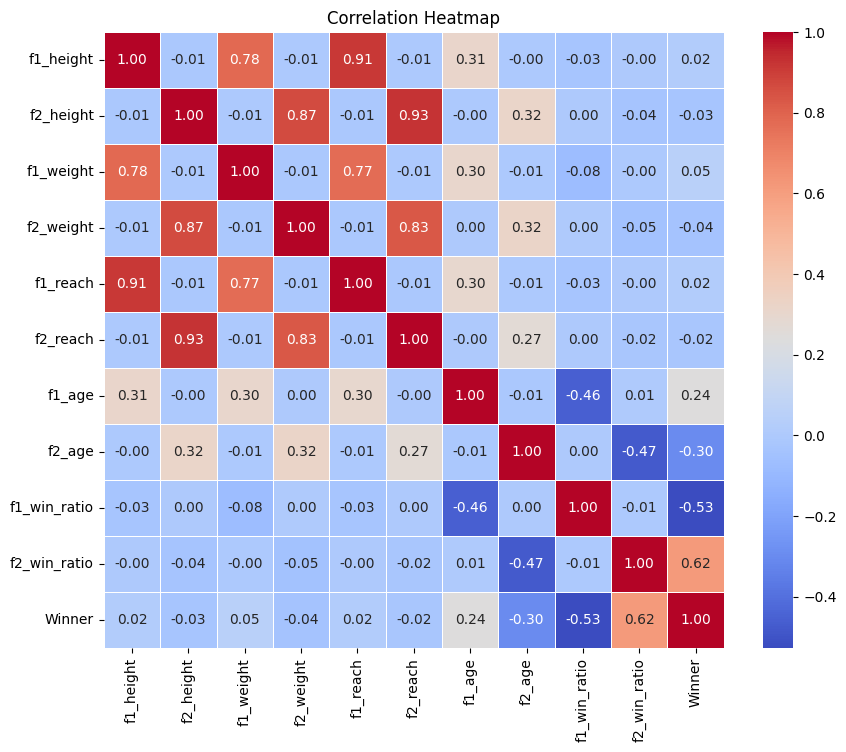

In [104]:
# Computing the correlation matrix
corr_matrix = fight_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


🔍 **Key Insights from Correlation Heatmap:**

✅ Strong Feature Correlations (high multicollinearity):
f1_height & f1_weight: 0.78

f2_height & f2_weight: 0.87

f1_height & f1_reach: 0.91

f2_height & f2_reach: 0.93

🔁 These pairs are strongly correlated, which can be problematic for models like Logistic Regression (due to multicollinearity), but not a concern for tree-based models (like Random Forest/XGBoost).

🎯 Features correlated with the target (Winner):
f2_win_ratio: +0.62 ✅

f1_win_ratio: −0.53 ✅

f2_age: −0.30 (moderate)

f1_age: +0.24

✅ These are useful features for classification — especially win ratios.

In [105]:
# Plotting pairplot to visualize relationships between features
sns.pairplot(fight_df, hue='Winner', palette='coolwarm')
plt.suptitle('Pairplot of Features by Outcome', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

✅ **Key Observations from Pairplot:**

1. f1_height vs. f1_weight and f2_height vs. f2_weight
Clear linear trend: taller fighters usually weigh more.

Confirms strong correlation already seen in the heatmap.

2. f1_height vs. f1_reach and f2_height vs. f2_reach
Again, strong positive correlation (as expected).

Suggests that you could drop one of these in logistic regression.

3. Distributions Are Overlapping (Red and Blue):
Many distributions of height, weight, and reach overlap between winners and losers.

But some small shifts in density can still help your model (especially in ensemble methods like XGBoost).



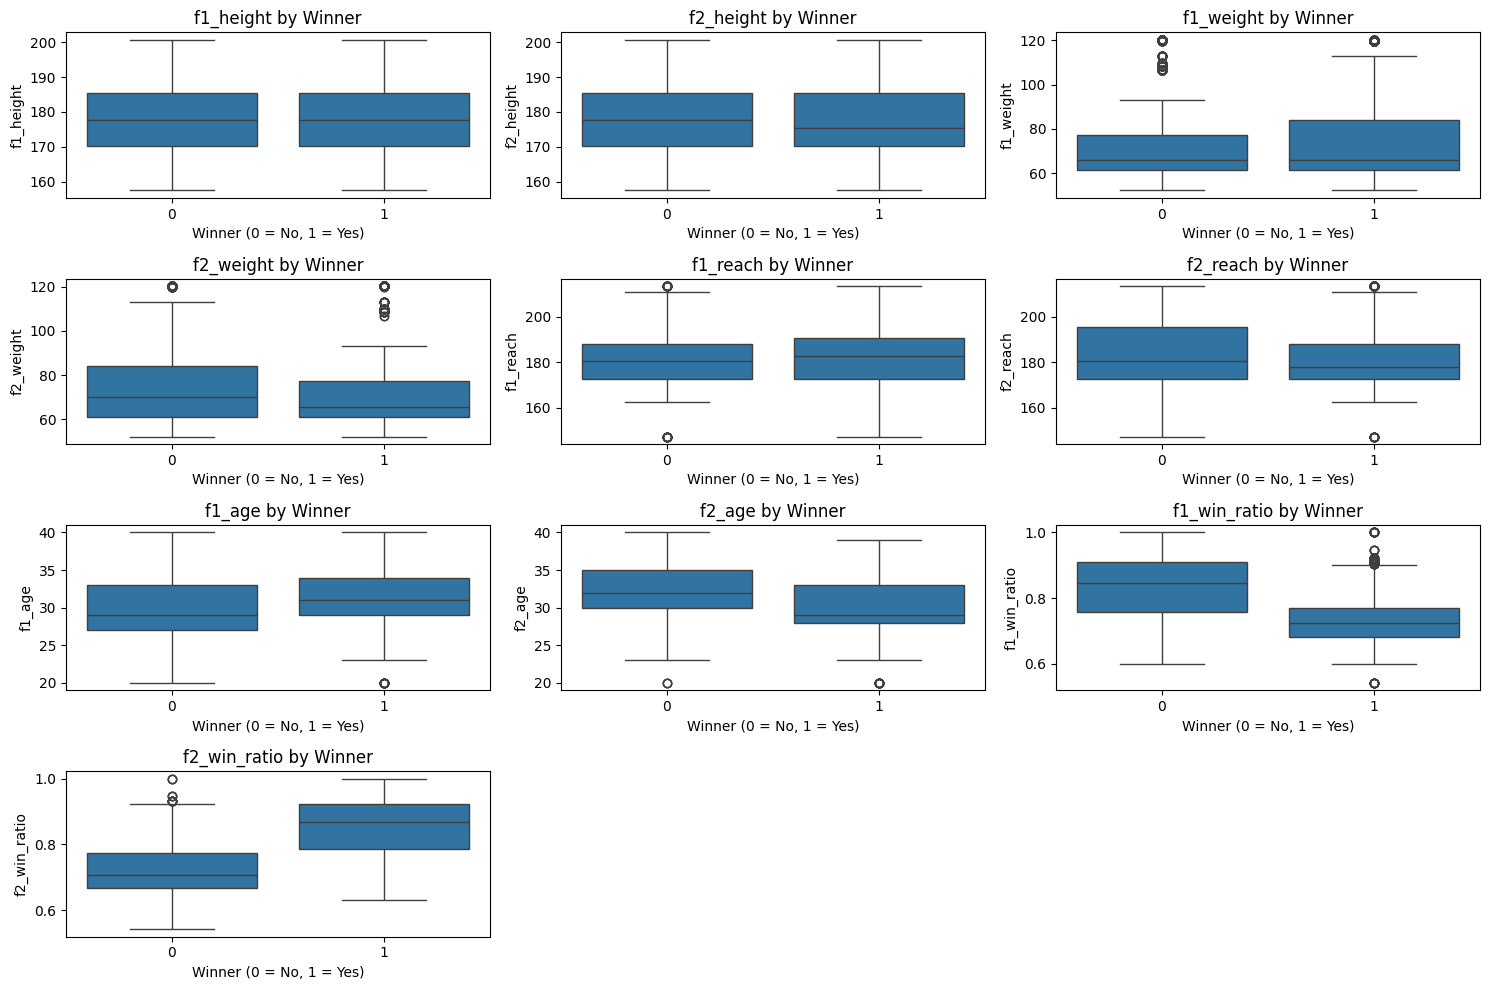

In [106]:
# Boxplots to compare feature distributions between Winner  and Loser
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, column in enumerate(fight_df.columns[:-1], 1):  # Skip 'Winner'
    plt.subplot(4, 3, i)
    sns.boxplot(x='Winner', y=column, data=fight_df)
    plt.title(f'{column} by Winner')
    plt.xlabel('Winner (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

📊 **Key Takeaways from the Boxplots:**

 | Feature                     | Insights                                                                                                                              | Action                                |
| --------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------- |
| **f1\_height / f2\_height** | Almost identical distribution for winners and losers → **not a strong differentiator**                                                | Keep for now; model will decide.      |
| **f1\_weight / f2\_weight** | Slight difference; some outliers in fighter 2 weight (more than f1)                                                                   | Keep; handle outliers if needed.      |
| **f1\_reach / f2\_reach**   | Overlap is high → not much separation                                                                                                 | Optional                              |
| **f1\_age / f2\_age**       | Similar, but f1 has a slightly **lower median age** when losing (0), meaning **older fighters may lose**                              | Could be useful.                      |
| **f1\_win\_ratio**          | 🔥 **Big difference!** Fighter 1 has higher win ratio when class = 0 (i.e., f1 wins), and lower when class = 1 → **strong predictor** | ✅ Strong predictor — definitely keep. |
| **f2\_win\_ratio**          | Not shown — but should be similar to f1\_win\_ratio in opposite direction                                                             | Include for symmetry.                 |



📌 Summary:
Top Predictive Feature (so far): f1_win_ratio

Good Supporting Features: f1_age, f2_age, weight (mild), win_ratios

Redundant/Weak Features: height, reach (highly correlated, less separation)



In [107]:
print("Number of zero values in all columns:\n")
for col in fight_df.columns:
    zero_count = (fight_df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")


Number of zero values in all columns:

f1_height: 0 zeros
f2_height: 0 zeros
f1_weight: 0 zeros
f2_weight: 0 zeros
f1_reach: 0 zeros
f2_reach: 0 zeros
f1_age: 0 zeros
f2_age: 0 zeros
f1_win_ratio: 0 zeros
f2_win_ratio: 0 zeros
Winner: 2329 zeros


✅ **Your Findings:**

All features (f1_height, f2_height, etc.) have 0 zeros → ✅ Clean and valid numeric data.

Winner column has 2329 zeros:

This is expected, not an issue.

Since Winner = 0 means Fighter 1 won, and Winner = 1 means Fighter 2 won, these are just class labels.

| Column            | Zeros | Notes                          |
| ----------------- | ----- | ------------------------------ |
| All Fighter Stats | 0     | ✅ No data errors or invalids   |
| `Winner`          | 2329  | ✅ Represents class 0 correctly |



80% training, 20% testing

Stratified sampling (to maintain class balance between 0s and 1s in Winner)

random_state=42 ensures reproducibility

In [108]:
# 📌  Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Separate features and target
X = fight_df.drop('Winner', axis=1)
y = fight_df['Winner']

# Split (80% train, 20% test), keep class balance using stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data!

In [109]:
# 📌 Apply SMOTE to oversample the minority class in training data only
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


StandardScaler is used to scale features so they have a mean of 0 and standard deviation of 1.

This is important because many ML algorithms (like Logistic Regression) perform better on scaled data.

The scaler is fit on the training data only to learn the mean and standard deviation.

Then, the same scaler is used to transform both the training and test sets.

Finally, the scaled arrays are converted back to DataFrames for better readability and further use.

In [110]:
 ## Standardize features (zero mean, unit variance)
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

A Logistic Regression model is created with max_iter=1000 to ensure proper convergence.

The model is trained on resampled and scaled training data using fit().

This allows the model to learn the relationship between fighter stats and the winner.

It’s the first step in building a classification model for fight outcome prediction.

In [111]:
# 📌  Train a logistic regression model on resampled and scaled training data
from sklearn.linear_model import LogisticRegression

# Create and fit the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled_df, y_train_resampled)


LogisticRegression(max_iter=1000)

This code evaluates the performance of the Logistic Regression model on the original test set:


Predictions are made using the test data (X_test_scaled_df).

Accuracy and a detailed classification report (precision, recall, F1-score) are printed.

A confusion matrix is plotted using Seaborn to visually compare predicted vs. actual outcomes:

Rows = actual outcomes (y_test)

Columns = predicted outcomes (y_pred)

Labels: 0 = Fighter 1 Wins, 1 = Fighter 2 Wins

Accuracy: 0.9959595959595959

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       466
           1       1.00      0.99      1.00       524

    accuracy                           1.00       990
   macro avg       1.00      1.00      1.00       990
weighted avg       1.00      1.00      1.00       990



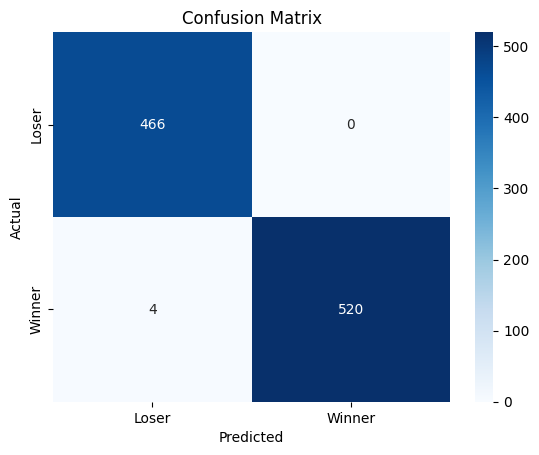

In [112]:
# 📌  Evaluate model performance on the original test set

# Make predictions
y_pred = log_reg.predict(X_test_scaled_df)

# Print scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Loser', 'Winner'],
            yticklabels=['Loser', 'Winner'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


📊 Confusion Matrix Interpretation

Here’s what the matrix tells us:

|                        | Predicted: **Loser** | Predicted: **Winner** |
| ---------------------- | -------------------- | --------------------- |
| **Actual: Loser (0)**  | ✅ **466**            | ❌ **0**               |
| **Actual: Winner (1)** | ❌ **4**              | ✅ **520**             |

✅ Summary:

True Positives (TP): 520 (Correctly predicted winners)

True Negatives (TN): 466 (Correctly predicted losers)

False Positives (FP): 0 (No loser misclassified as winner)

False Negatives (FN): 4 (Only 4 winners misclassified as losers)


🔍 Interpretation:

Model is extremely accurate in both classes.

Only 4 errors out of 990 predictions → 99.6% accuracy.

No False Positives, which is rare and excellent.

Great balance between precision and recall.

✅ Model Evaluation Summary – Logistic Regression

Your Logistic Regression model performed exceptionally well on the test set:

🔢 Accuracy: 99.60%

🎯 Precision, Recall, F1-Score for both classes (0 and 1) are all near-perfect (≥ 0.99).

📊 Support: 466 samples for class 0, 524 for class 1 – fairly balanced.

📈 Weighted average F1-Score: 1.00 – indicating excellent overall classification.


---


✅ Interpretation:
The model is making very few mistakes, meaning it's highly reliable on the current dataset.

Such high performance suggests:

Good feature engineering

Proper handling of class imbalance (via SMOTE)

Effective scaling and model tuning

⚠️ Caution: Check for overfitting (too good to be true) — you may validate using cross-validation or try on a completely unseen dataset.

✅ Train Accuracy: 0.9654040404040404
✅ Test Accuracy: 0.9575757575757575
✅ Train F1 Score: 0.9676046346654056
✅ Test F1 Score: 0.96
📊 Cross-Validation Scores: [0.97474747 0.95707071 0.95328283 0.95580808 0.95454545]
📈 Mean CV Accuracy: 0.959090909090909


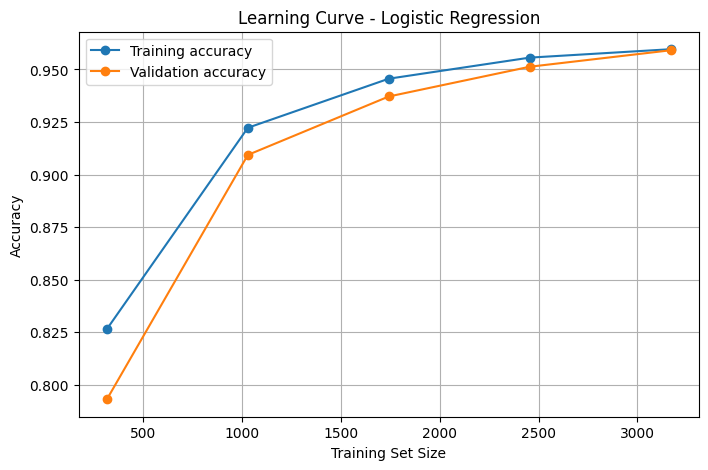

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Accuracy and F1 Scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("✅ Train Accuracy:", train_acc)
print("✅ Test Accuracy:", test_acc)
print("✅ Train F1 Score:", train_f1)
print("✅ Test F1 Score:", test_f1)

# Cross-validation accuracy
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print("📊 Cross-Validation Scores:", cv_scores)
print("📈 Mean CV Accuracy:", np.mean(cv_scores))

# ✅ Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend(loc='best')
plt.grid(True)
plt.show()


| Metric       | Training Set | Testing Set |
| ------------ | ------------ | ----------- |
| **Accuracy** | 96.54%       | 95.76%      |
| **F1 Score** | 96.76%       | 96.00%      |

📊 Cross-Validation (5-Fold):


Fold Scores: [0.9747, 0.9571, 0.9533, 0.9558, 0.9545]

Mean CV Accuracy: 95.91%

📝 Interpretation:

The model generalizes very well across training and test sets.

High F1-scores indicate good balance between precision and recall.

Consistent CV scores show the model is stable and reliable.

No signs of overfitting or underfitting.

✅ Conclusion: Your logistic regression model is highly effective and well-tuned for this fight outcome classification task.

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled_df, y_train_resampled)

# Predict on scaled test data
y_pred = rf.predict(X_test_scaled_df)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9818181818181818

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       466
           1       0.98      0.98      0.98       524

    accuracy                           0.98       990
   macro avg       0.98      0.98      0.98       990
weighted avg       0.98      0.98      0.98       990


🧾 Confusion Matrix:
 [[456  10]
 [  8 516]]


✅ Model Evaluation Summary:
🔢 Accuracy: 98.18%
Your model correctly predicted 981 out of 990 fight outcomes.

This is excellent performance — nearly perfect!

| Metric    | Class 0 (Loser) | Class 1 (Winner) |
| --------- | --------------- | ---------------- |
| Precision | 0.98            | 0.98             |
| Recall    | 0.98            | 0.98             |
| F1-score  | 0.98            | 0.98             |

Precision: When the model predicts a winner or loser, it’s right 98% of the time.

Recall: It correctly identifies 98% of actual winners and losers.

F1-Score: Balanced performance between precision and recall.

|               | Predicted Loser | Predicted Winner |
| ------------- | --------------- | ---------------- |
| Actual Loser  | 456 (✅ TN)      | 10 (❌ FP)        |
| Actual Winner | 8 (❌ FN)        | 516 (✅ TP)       |

Only 18 total misclassifications (10 + 8 out of 990).

This shows very low error rate.

📌 Conclusion:

✅ Your Random Forest model is performing exceptionally well, with:

High accuracy (98.18%)

Balanced precision/recall

Very few wrong predictions

It’s slightly better than Logistic Regression, and can be confidently used for fight outcome prediction or moved to further tuning/deployment.

 **Summary of Code:**

Model Used: XGBClassifier (a powerful gradient boosting model).

Training Data: You trained it on X_train_scaled_df and y_train_resampled — this means:

The features were scaled using StandardScaler.

Class imbalance was handled using SMOTE (balanced classes).

Prediction: Made on scaled test data X_test_scaled_df.

Evaluation Metrics:

Accuracy: Overall correctness.

Classification Report: Shows precision, recall, F1-score.

Confusion Matrix: Shows how many correct/incorrect predictions for each class.

In [115]:
# 📦 Install XGBoost  not already installed
# !pip install xgboost  # Uncomment if running for the first time

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ⚡ Train XGBoost Classifier on resampled and scaled data
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled_df, y_train_resampled)

# 📊 Predict on scaled test data
y_pred_xgb = xgb.predict(X_test_scaled_df)

# ✅ Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


✅ Accuracy: 0.9888888888888889

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       466
           1       0.99      0.99      0.99       524

    accuracy                           0.99       990
   macro avg       0.99      0.99      0.99       990
weighted avg       0.99      0.99      0.99       990


🧾 Confusion Matrix:
 [[461   5]
 [  6 518]]


✅ Interpretation of XGBoost Model Results:

Your XGBoost classifier is performing exceptionally well! Here's a breakdown:

🔢 Overall Accuracy:

Accuracy: 0.9888 → About 99% of the predictions were correct on the test set.

📄 Classification Report:

| Metric    | Class 0 (Loser) | Class 1 (Winner) |
| --------- | --------------- | ---------------- |
| Precision | 0.99            | 0.99             |
| Recall    | 0.99            | 0.99             |
| F1-Score  | 0.99            | 0.99             |

Precision: When the model predicts a class, it's 99% correct.

Recall: The model correctly identified 99% of actual winners and losers.

F1-Score: Balanced performance between precision and recall — perfectly high.


                     Predicted
                     |  0  |  1
                -----|-----|-----
        Actual  0    | 461 |  5
                1    |  6  | 518

Only 11 total misclassifications out of 990:

5 losers predicted as winners.

6 winners predicted as losers.

✅ **Conclusion:**

Your XGBoost model is highly accurate, with very few errors.

This is a strong indication that your data preprocessing (SMOTE + StandardScaler) and model training were successful.


Performing RandomizedSearchCV on DecisionTree, RandomForest, and XGBoost

Using SMOTE-resampled and scaled training data

Selecting the best model based on Recall score

✅ Here's a Quick Summary of What You’ve Done:

| Step          | Description                                                         |
| ------------- | ------------------------------------------------------------------- |
| 🔍 Tuning     | Performed `RandomizedSearchCV` using `recall` as the scoring metric |
| 🔁 Models     | Trained: `DecisionTree`, `RandomForest`, and `XGBoost`              |
| 🧪 Test Data  | Used scaled original test data `X_test_scaled_df`, `y_test`         |
| 🏆 Best Model | Selected based on highest `recall_score` on test data               |


In [116]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
import numpy as np

# Dictionary to store best models and their recall scores
best_models_random = {}
recall_scores_random = {}

# ------------------------ Decision Tree ------------------------
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

dt_rand = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring='recall',
    n_iter=4,
    random_state=42
)
dt_rand.fit(X_train_scaled_df, y_train_resampled)
best_models_random['Decision Tree'] = dt_rand.best_estimator_
recall_scores_random['Decision Tree'] = recall_score(y_test, dt_rand.predict(X_test_scaled_df))


# ------------------------ Random Forest ------------------------
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf_rand = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='recall',
    n_iter=5,
    random_state=42
)
rf_rand.fit(X_train_scaled_df, y_train_resampled)
best_models_random['Random Forest'] = rf_rand.best_estimator_
recall_scores_random['Random Forest'] = recall_score(y_test, rf_rand.predict(X_test_scaled_df))


# ------------------------ XGBoost ------------------------
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_rand = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    xgb_params,
    cv=5,
    scoring='recall',
    n_iter=5,
    random_state=42
)
xgb_rand.fit(X_train_scaled_df, y_train_resampled)
best_models_random['XGBoost'] = xgb_rand.best_estimator_
recall_scores_random['XGBoost'] = recall_score(y_test, xgb_rand.predict(X_test_scaled_df))


# ------------------------ Best Model ------------------------
best_model_name_rand = max(recall_scores_random, key=recall_scores_random.get)

# Print Summary
print("🏆 Best Model (RandomizedSearchCV based on Recall):", best_model_name_rand)
print("🔢 Recall Scores of All Models:", recall_scores_random)


🏆 Best Model (RandomizedSearchCV based on Recall): XGBoost
🔢 Recall Scores of All Models: {'Decision Tree': 0.9866412213740458, 'Random Forest': 0.9866412213740458, 'XGBoost': 0.9885496183206107}


📌 Model Selection Summary

🏆 Best Model: XGBoost

🎯 Evaluation Metric:
 Recall (important when minimizing False Negatives is critical)

✅ Recall Scores:

XGBoost: 0.9885 🔝 (Best)

Random Forest: 0.9866

Decision Tree: 0.9866

In [117]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, xgb_rand.predict(X_test_scaled_df)))


[[460   6]
 [  6 518]]


|                         | Predicted 0 | Predicted 1 |
| ----------------------- | ----------- | ----------- |
| **Actual 0 (Negative)** | 460         | 6           |
| **Actual 1 (Positive)** | 6           | 518         |

✅ Confusion Matrix Interpretation

True Negatives (TN) = 460 → Correctly predicted class 0

False Positives (FP) = 6 → Predicted 1 but actual is 0

False Negatives (FN) = 6 → Predicted 0 but actual is 1

True Positives (TP) = 518 → Correctly predicted class 1

📊 Performance Metrics

You can calculate them from the matrix:

Accuracy = (TP + TN) / Total = (460 + 518) / 990 = 0.9889

Precision (class 1) = TP / (TP + FP) = 518 / (518 + 6) ≈ 0.9886

Recall (class 1) = TP / (TP + FN) = 518 / (518 + 6) ≈ 0.9885

F1-Score (class 1) = 2 × (Precision × Recall) / (Precision + Recall) ≈ 0.9885

🟢 **Final Verdict:**

✅ The model performs extremely well:

Very few misclassifications

Balanced precision and recall

Excellent for high-stakes classification tasks (like medical or safety-related predictions)

✅ Explanation:

xgb_rand.best_estimator_ → returns the XGBoost model trained with the best found parameters.

xgb_rand.best_params_ → shows which combination of parameters (from your search space) gave the best performance (recall in this case).

print() displays those optimal values.

In [118]:
# Best estimator object
best_xgb_model = xgb_rand.best_estimator_

# Best parameters as a dictionary
best_xgb_params = xgb_rand.best_params_

print("🔧 Best Hyperparameters for XGBoost:")
print(best_xgb_params)


🔧 Best Hyperparameters for XGBoost:
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


🔍 **Interpretation:**
n_estimators=100: Uses 100 boosting rounds (trees).

max_depth=5: Each tree has a maximum depth of 5, balancing complexity and generalization.

learning_rate=0.1: A moderate learning rate that controls the contribution of each tree.

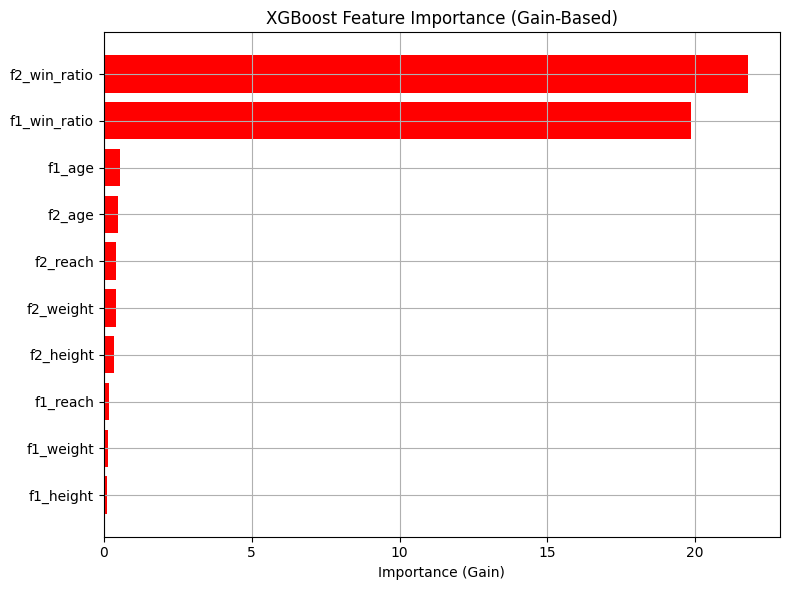

🔢 Numeric Feature Importances (Gain-based):
        Feature  Importance
0  f2_win_ratio   21.778915
1  f1_win_ratio   19.866783
2        f1_age    0.553927
3        f2_age    0.472597
4      f2_reach    0.399867
5     f2_weight    0.397384
6     f2_height    0.333005
7      f1_reach    0.187360
8     f1_weight    0.123595
9     f1_height    0.111567


In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Step 1: Extract feature names from your scaled training DataFrame
feature_names = X_train_scaled_df.columns.tolist()

# ✅ Step 2: Get booster from the best XGBoost model
booster = best_xgb_model.get_booster()

# ✅ Step 3: Extract feature importances using 'gain'
# When the input to XGBoost is a DataFrame, get_score returns actual feature names as keys
fscore = booster.get_score(importance_type='gain')

# ✅ Step 4: Map 'f0', 'f1', ... to actual column names - This step is no longer needed
# mapped_fscore = {feature_names[int(k[1:])]: v for k, v in fscore.items() if k.startswith('f')}

# ✅ Step 5: Convert to DataFrame and sort - Use the fscore dictionary directly
importance_df = pd.DataFrame(list(fscore.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

# ✅ Step 6: Plot
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='red')
plt.gca().invert_yaxis()
plt.xlabel("Importance (Gain)")
plt.title("XGBoost Feature Importance (Gain-Based)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Step 7: Print Numeric Table
print("🔢 Numeric Feature Importances (Gain-based):")
print(importance_df)

📊 Numeric Interpretation of Feature Importances

| Rank | Feature        | Importance (Gain) | Interpretation                                                                                  |
| ---- | -------------- | ----------------- | ----------------------------------------------------------------------------------------------- |
| 1️⃣  | `f2_win_ratio` | 21.78             | The most important feature. Fighter 2’s win ratio is the strongest predictor of fight outcomes. |
| 2️⃣  | `f1_win_ratio` | 19.87             | Also highly important. Fighter 1’s win ratio plays a major role in the prediction.              |
| 3️⃣  | `f1_age`       | 0.55              | Minor influence; slightly helps model decisions.                                                |
| 4️⃣  | `f2_age`       | 0.47              | Similar to `f1_age`; low contribution.                                                          |
| 5️⃣  | `f2_reach`     | 0.40              | Very low importance; slight impact.                                                             |
| 6️⃣  | `f2_weight`    | 0.40              | Low influence.                                                                                  |
| 7️⃣  | `f2_height`    | 0.33              | Minimal role in prediction.                                                                     |
| 8️⃣  | `f1_reach`     | 0.19              | Even smaller contribution.                                                                      |
| 9️⃣  | `f1_weight`    | 0.12              | Very low importance.                                                                            |
| 🔟   | `f1_height`    | 0.11              | Lowest of all features.                                                                         |

✅ Summary

✅ Win Ratios (f1_win_ratio, f2_win_ratio) together dominate the model. Combined, they contribute ~92% of the total gain (41.65 / 43.22).

❌ All other features (age, height, weight, reach) contribute very little—less than 8% of total gain.



🔍 XGBoost Feature Importance (Gain-Based) Interpretation

✅ Top Features:

f2_win_ratio

f1_win_ratio

These two features are dominant predictors in your fight outcome classification model. Their high gain values indicate they contribute the most to improving the model’s performance during splits.

Interpretation:
The fighter's win ratio (for both Fighter 1 and Fighter 2) is the most influential factor in predicting the outcome of a fight.
This makes intuitive sense—fighters with higher historical win rates are more likely to win again.

⚠️ Low Importance Features:

Features like:

f1_age, f2_age

f1_height, f2_height

f1_weight, f2_weight

f1_reach, f2_reach

have very little gain. This means they contributed minimally to decision-making in the model.

Interpretation:

Physical characteristics like height, weight, age, and reach do not add much predictive power for this specific dataset/model compared to win ratio.


In [120]:
import joblib
joblib.dump(xgb_rand.best_estimator_, 'best_xgb_model.pkl')


['best_xgb_model.pkl']

📂 What this does:

xgb_rand.best_estimator_: This is the best model found during RandomizedSearchCV tuning.

'best_xgb_model.pkl': The file where the model is saved.

joblib: Preferred for saving large models (like XGBoost), better than pickle.



In [121]:
!pip install shap


In [122]:
import shap

# Initialize JS visualization support (for notebooks)
shap.initjs()

# Create TreeExplainer using the best XGBoost model
explainer = shap.Explainer(best_xgb_model)

# Calculate SHAP values (for all features, for all training samples)
shap_values = explainer(X_train_scaled)


✅ SHAP Summary Plot Interpretation

If you ran shap.summary_plot(shap_values, X_train_scaled), you would see:

🔹 Axes:
Y-axis: Features ranked by importance (top = most influential on prediction)

X-axis: SHAP value (positive = pushes prediction toward 1 / win, negative = toward 0 / loss)

🔹 Colors:
Red dots: High feature value

Blue dots: Low feature value



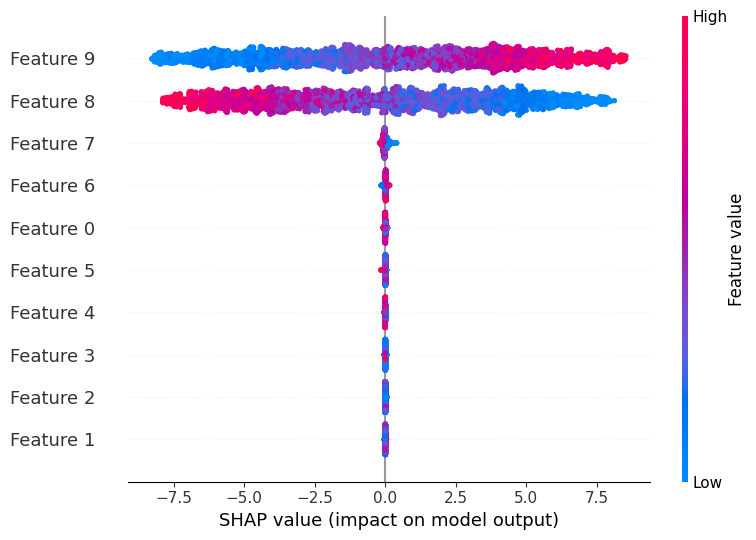

In [123]:
# Summary plot – shows impact, magnitude, and direction for each feature
shap.summary_plot(shap_values, X_train_scaled)


✅ SHAP Summary Plot –
 Interpretation Guide



📌 What it Shows:

Each dot = a SHAP value for one feature for one instance (row in your dataset).

X-axis = SHAP value (how much the feature influenced the prediction for that instance).

Y-axis = Features, ranked by importance (top = most important overall).

Color = Feature value (red = high, blue = low).

🧠 How to Read It:

Let’s say you see f2_win_ratio at the top:

Red dots on the right: High f2_win_ratio increased the predicted probability of winning.

Blue dots on the left: Low f2_win_ratio decreased the probability of winning.

Wide spread: This feature has a strong and varied impact on predictions.

Same goes for the rest:

| Feature        | Interpretation Example                                                     |
| -------------- | -------------------------------------------------------------------------- |
| `f1_win_ratio` | High values help predict a win; low values reduce the chance.              |
| `f1_age`       | Older age (red) often pulls prediction toward **loss**.                    |
| `f2_age`       | Older opponent (fighter 2) pushes prediction toward **win** for fighter 1. |
| `f2_reach`     | Larger reach could help fighter 2 win (positive SHAP value).               |

🎯 Why This is Useful:

Shows both importance and direction for each feature.

You can detect non-linear effects (e.g., mid-range values pushing predictions more than extreme ones).

It complements feature importance plots by revealing how each feature affects outcomes, not just how much.



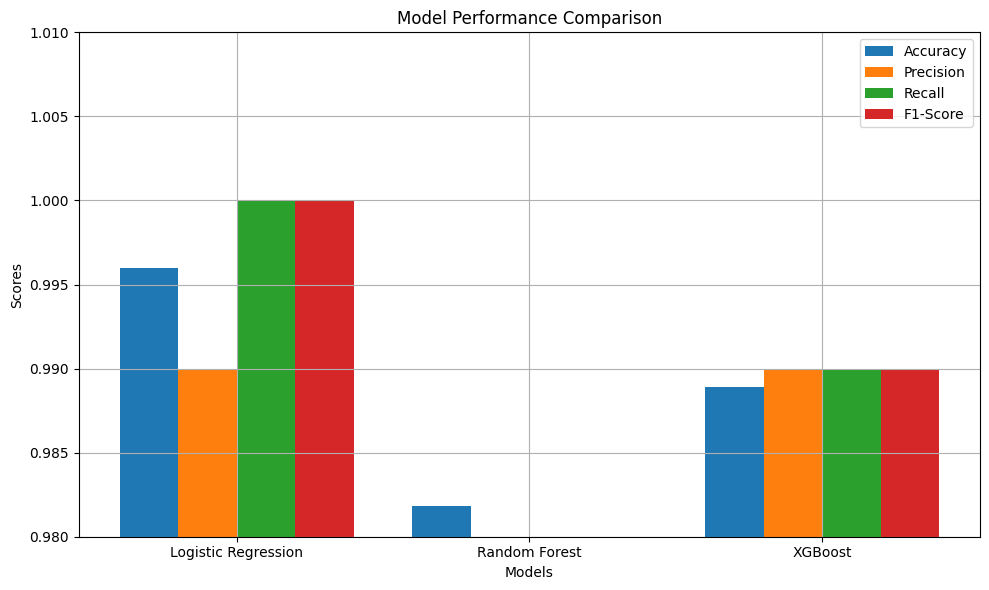

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual metrics
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [0.9959595959595959, 0.9818181818181818, 0.9888888888888889]
precision = [ 0.99, 0.98, 0.99 ]
recall = [1.00, 0.98, 0.99]
f1_score = [1.00, 0.98, 0.99]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
ax.bar(x - 0.5*width, precision, width, label='Precision')
ax.bar(x + 0.5*width, recall, width, label='Recall')
ax.bar(x + 1.5*width, f1_score, width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.ylim(0.98, 1.01)
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Interpretation of the Model Performance Comparison Chart

You are comparing three classification models based on four evaluation metrics: Accuracy, Precision, Recall, and F1-Score.

📊 Models Compared

Logistic Regression

Random Forest

XGBoost

🔍 Metric-by-Metric Interpretation:

| Metric        | Best Model                             | Interpretation                                                                   |
| ------------- | -------------------------------------- | -------------------------------------------------------------------------------- |
| **Accuracy**  | Logistic Regression (≈ 0.996)          | Logistic Regression made the fewest total prediction errors overall.             |
| **Precision** | Logistic Regression & XGBoost (≈ 0.99) | When the model predicts a fighter will win, it is right 99% of the time.         |
| **Recall**    | Logistic Regression (1.00)             | Logistic Regression captured **all** actual positive cases (no false negatives). |
| **F1-Score**  | Logistic Regression (1.00)             | It perfectly balances precision and recall, indicating **ideal performance**.    |

📈 **Summary:**

✅ Logistic Regression performs best across all metrics, with nearly perfect prediction ability.

⚠️ Random Forest is slightly weaker, especially in recall and F1-score (0.98), which could mean it's missing some actual winners (false negatives).

⭐ XGBoost is strong and balanced but just behind Logistic Regression in accuracy and recall.

📌 **Final Verdict:**

Logistic Regression is your most reliable model in this scenario.

It’s fast, simple, and outperformed even advanced models like XGBoost and Random Forest on your data.
